# Unit 5 - Financial Planning

In [54]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [55]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [56]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [57]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [58]:
# Fetch current BTC price
response = requests.get(btc_url)
data = response.json()
btc_price = data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response = requests.get(eth_url)
data = response.json()
eth_price = data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23120.68
The current value of your 5.3 ETH is $8650.66


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [59]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [60]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [61]:
# Format current date as ISO format
today = pd.Timestamp("2022-09-06", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-09-06 04:00:00+00:00  99.96  99.97  99.41  99.42  5105618       20910   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-09-06 04:00:00+00:00  99.547845  393.13  394.12  388.42  390.76   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-09-06 04:00:00+00:00  75551777      552658  391.263275

In [62]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.42
Current SPY closing price: $390.76


In [63]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $19884.00
The current value of your 50 SPY shares is $19538.00


### Savings Health Analysis

In [64]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
data = {
    "amount": [my_btc_value + my_eth_value, my_agg_value + my_spy_value]
}

titles = ["crypto","shares"]
# Create savings DataFrame
df_savings = pd.DataFrame(data, titles)
# df_savings["amount"] = df_savings["amount"].apply(lambda x: "${:.2f}".format((x)))
# Display savings DataFrame
display(df_savings)

,amount
crypto,31771.336
shares,39422.000


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

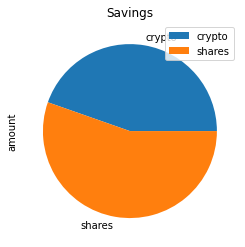

In [65]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings")

In [66]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value + my_agg_value + my_spy_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have more than enough money in this fund!")
elif total_savings == emergency_fund:
    print("You've reached your target for your emergency fund!")
else:
    print("You are $" + (emergency_fund - total_savings) + " away from your emergency fund target.")

Congratulations, you have more than enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [67]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [68]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [77]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data.fillna(0),
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [78]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

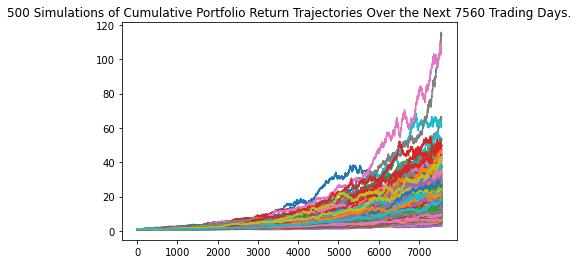

In [80]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation() 

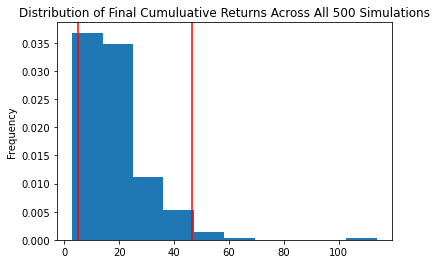

In [81]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             18.551221
std              12.078363
min               2.898896
25%              10.327054
50%              16.317708
75%              22.508927
max             113.696856
95% CI Lower      4.974183
95% CI Upper     46.472571
Name: 7560, dtype: float64


C:\Users\Khalid\Desktop\apiHw\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [86]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99483.65 and $929451.42


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [85]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $149225.48 and $1394177.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [87]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data.fillna(0),
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

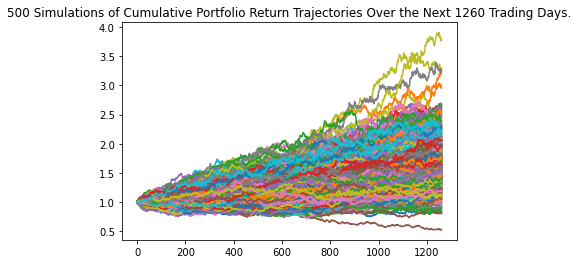

In [92]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

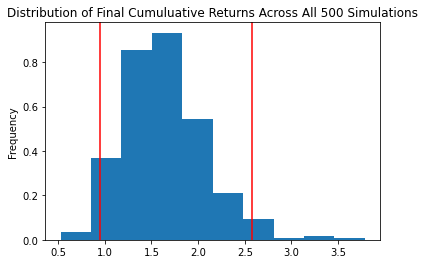

In [93]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.644320
std               0.422383
min               0.525766
25%               1.357041
50%               1.597331
75%               1.882880
max               3.786308
95% CI Lower      0.949887
95% CI Upper      2.572236
Name: 1260, dtype: float64


C:\Users\Khalid\Desktop\apiHw\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")